<a href="https://colab.research.google.com/github/SJhawar1010/LLM/blob/main/Satyam_554_LLM_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from wordcloud import WordCloud

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [3]:
text = "The patient was diagnosed with type 2 diabetes and prescribed metformin."

In [4]:
tokens = tokenizer.tokenize(text)
print("Tokens:", tokens)

Tokens: ['the', 'patient', 'was', 'diagnosed', 'with', 'type', '2', 'diabetes', 'and', 'prescribed', 'met', '##form', '##in', '.']


Input IDs: [101, 1996, 5776, 2001, 11441, 2007, 2828, 1016, 14671, 1998, 16250, 2777, 14192, 2378, 1012, 102]


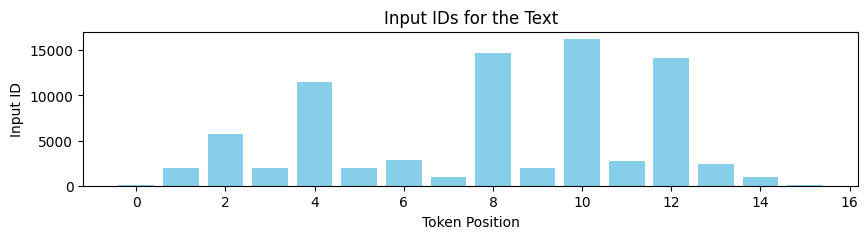

In [24]:
input_ids = tokenizer.encode(text, add_special_tokens=True)
print("Input IDs:", input_ids)
plt.figure(figsize=(10, 2))
plt.bar(range(len(input_ids)), input_ids, color='skyblue')
plt.title("Input IDs for the Text")
plt.xlabel("Token Position")
plt.ylabel("Input ID")
plt.show()

In [25]:
decoded_text = tokenizer.decode(input_ids)
print("Decoded Text:", decoded_text)

Decoded Text: [CLS] the patient was diagnosed with type 2 diabetes and prescribed metformin. [SEP]


In [6]:
texts = [
    "The patient was diagnosed with type 2 diabetes and prescribed metformin.",
    "MRI scans showed a lesion in the frontal lobe.",
    "The patient is a 45-year-old male with a history of hypertension."
]

In [7]:
token_lengths = [len(tokenizer.tokenize(text)) for text in texts]

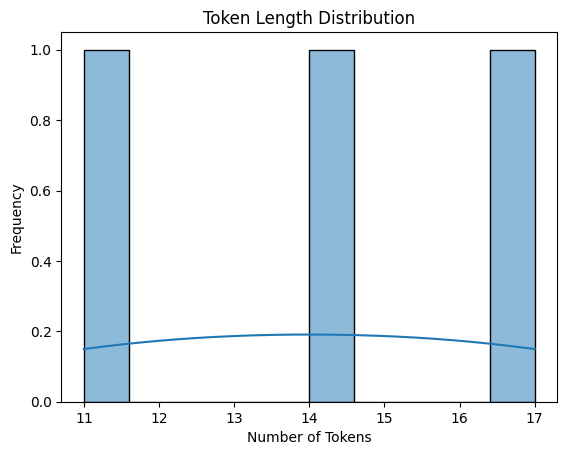

In [8]:
sns.histplot(token_lengths, kde=True, bins=10)
plt.title("Token Length Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

In [9]:
all_text = " ".join(texts)
all_tokens = " ".join(tokenizer.tokenize(all_text))

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

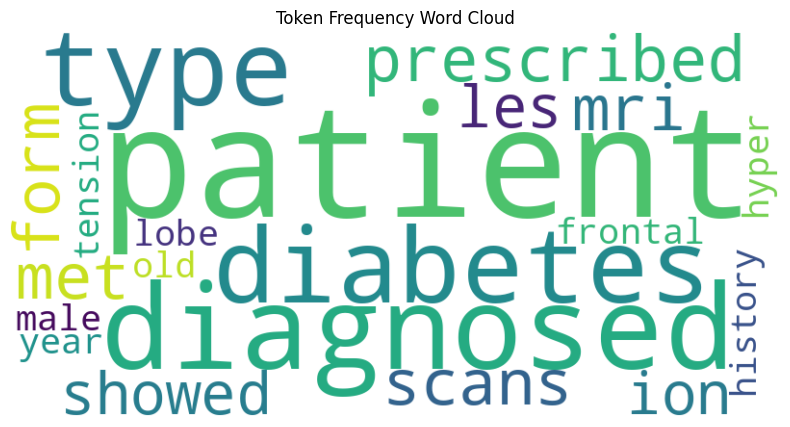

In [11]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Token Frequency Word Cloud")
plt.show()


In [12]:
input_ids = tokenizer(text, return_tensors='pt')['input_ids']
print("Model Input IDs:", input_ids)

Model Input IDs: tensor([[  101,  1996,  5776,  2001, 11441,  2007,  2828,  1016, 14671,  1998,
         16250,  2777, 14192,  2378,  1012,   102]])


In [13]:
model = BertModel.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [14]:
with torch.no_grad():
    embeddings = model(input_ids)['last_hidden_state'][0].numpy()

In [15]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

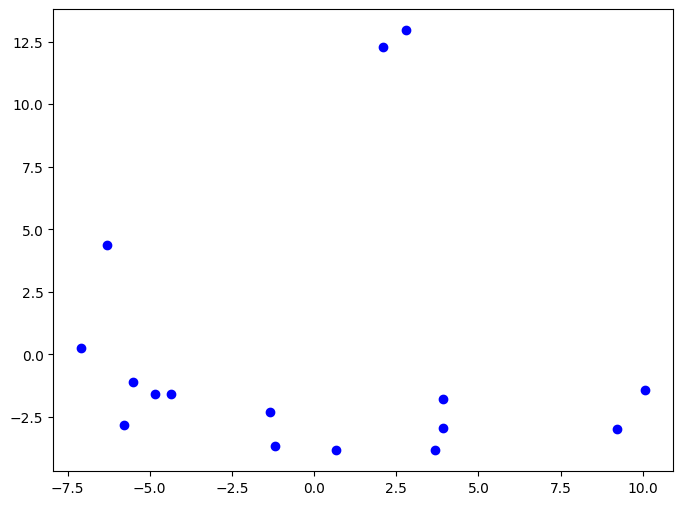

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', marker='o')

In [20]:
with torch.no_grad():
    outputs = model(input_ids, output_attentions=True)
    attentions = outputs.attentions[-1][0].detach().numpy()

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [23]:
print("Token Embeddings:", outputs)

Token Embeddings: BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.3397, -0.0891, -0.3992,  ..., -0.2553,  0.2762,  0.2974],
         [-0.6767, -0.7123, -0.5605,  ..., -0.3702,  0.6651, -0.1034],
         [-0.7789, -0.7025, -0.0872,  ..., -0.7075,  0.1279, -0.1314],
         ...,
         [-0.5085, -0.2724, -0.1492,  ..., -0.6959, -0.6345, -0.0195],
         [ 0.5263,  0.0532, -0.4803,  ...,  0.3260, -0.7075, -0.2064],
         [ 0.1616,  0.1643, -0.2808,  ...,  0.3737, -0.8119, -0.4751]]]), pooler_output=tensor([[-0.8786, -0.4014, -0.7415,  0.7389,  0.4561, -0.1872,  0.8240,  0.4410,
         -0.6550, -1.0000, -0.2281,  0.8445,  0.9845,  0.2830,  0.8917, -0.6626,
         -0.1792, -0.6031,  0.3899, -0.4001,  0.6368,  0.9999,  0.2139,  0.3235,
          0.5043,  0.9276, -0.5771,  0.8937,  0.9453,  0.7798, -0.6789,  0.3318,
         -0.9887, -0.2383, -0.7845, -0.9918,  0.4140, -0.8028, -0.0626, -0.2296,
         -0.8712,  0.3981,  1.0000, -0.3359,  0.4131, -0.

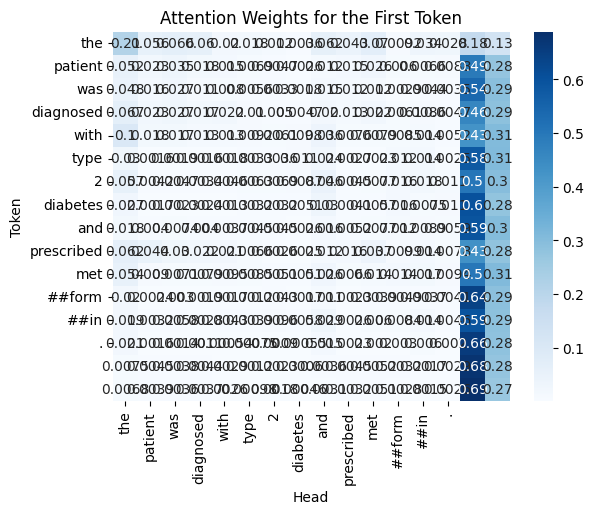

In [21]:
sns.heatmap(attentions[0], annot=True, cmap='Blues', xticklabels=tokens, yticklabels=tokens)
plt.title("Attention Weights for the First Token")
plt.xlabel("Head")
plt.ylabel("Token")
plt.show()